In [24]:
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


In [25]:
train_file_path = "train-data.tsv"
test_file_path = "valid-data.tsv"

In [26]:
data_set=pd.read_table(train_file_path,sep="\t",header=None,names=["label","message"])

In [27]:
data_set.head()

,label,message
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...


## Exploring the data set

In [28]:
data_set.shape

(4179, 2)

In [29]:
data_set.isnull().sum()

label      0
message    0
dtype: int64

In [30]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4179 entries, 0 to 4178
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    4179 non-null   object
 1   message  4179 non-null   object
dtypes: object(2)
memory usage: 65.4+ KB


In [31]:
data_set.describe()

,label,message
count,4179,4179
unique,2,3935
top,ham,"sorry, i'll call later"
freq,3619,22


## Exploring more the data set

In [32]:
len_ham=data_set["label"][data_set.label=="ham"]
len_spam=data_set["label"][data_set.label=="spam"]

ham messages length is 3619
spam messages length is 560


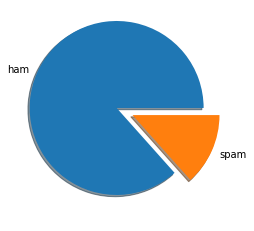

In [33]:
print("ham messages length is %d"%len(len_ham))
print("spam messages length is %d"%len(len_spam))
arr=np.array([len(len_ham),len(len_spam)])
labels=["ham","spam"]
plt.pie(arr,labels=labels,explode=[0.2,0.0],shadow=True)
plt.show()
# here data is inbalanced .. the model will learn from ham messages more than spam messages

## data preprocessing... text preprocessing

In [50]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
def text_preprocessing(text):
    ps = PorterStemmer()
    txt=str(text).lower()
    words = word_tokenize(txt)
    return ' '.join(words)

In [51]:
data_set["new message"]=data_set["message"].apply(lambda x:text_preprocessing(x))
data_set

,label,message,new message
0,0,ahhhh...just woken up!had a bad dream about u ...,ahhhh ... just woken up ! had a bad dream abou...
1,0,you can never do nothing,you can never do nothing
2,0,"now u sound like manky scouse boy steve,like! ...","now u sound like manky scouse boy steve , like..."
3,0,mum say we wan to go then go... then she can s...,mum say we wan to go then go ... then she can ...
4,0,never y lei... i v lazy... got wat? dat day ü ...,never y lei ... i v lazy ... got wat ? dat day...
...,...,...,...
4174,0,just woke up. yeesh its late. but i didn't fal...,just woke up . yeesh its late . but i did n't ...
4175,0,what do u reckon as need 2 arrange transport i...,what do u reckon as need 2 arrange transport i...
4176,1,free entry into our £250 weekly competition ju...,free entry into our £250 weekly competition ju...
4177,1,-pls stop bootydelious (32/f) is inviting you ...,-pls stop bootydelious ( 32/f ) is inviting yo...


# features encoding

In [36]:
data_set['label']=data_set.label.map({"ham":0,"spam":1})
data_set.head()

,label,message,new message
0,0,ahhhh...just woken up!had a bad dream about u ...,"ahhhh...justwokenup!hadabaddreamaboututho,soid..."
1,0,you can never do nothing,youcanneverdonothing
2,0,"now u sound like manky scouse boy steve,like! ...","nowusoundlikemankyscouseboysteve,like!iistrave..."
3,0,mum say we wan to go then go... then she can s...,mumsaywewantogothengo...thenshecanshunbianwatc...
4,0,never y lei... i v lazy... got wat? dat day ü ...,neverylei...ivlazy...gotwat?datdayüsendmedaurl...


# split data for training and testing

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_set["new message"],data_set["label"],random_state=1)
print("all data rows %d"%(data_set.shape[0]))
print("train data rows %d"%(X_train.shape[0]))
print("test data rows %d"%(X_test.shape[0]))

all data rows 4179
train data rows 3134
test data rows 1045


# text to numbres

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
countVectorizer=CountVectorizer()
training_data=countVectorizer.fit_transform(X_train)
testing_data=countVectorizer.transform(X_test)

In [39]:
training_data

<3134x8019 sparse matrix of type '<class 'numpy.int64'>'
	with 10596 stored elements in Compressed Sparse Row format>

# making the model

In [40]:
from sklearn.naive_bayes import MultinomialNB
_naive_bayes=MultinomialNB()
_naive_bayes.fit(training_data,y_train)

MultinomialNB()

# predicting from test data

In [41]:
predictions=_naive_bayes.predict(testing_data)
predictions

array([0, 0, 1, ..., 0, 0, 0])

# accurancy and testing our model

In [42]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("Accuracy %s"%(str(accuracy_score(y_test,predictions))))
print("Precision %s"%(str(precision_score(y_test,predictions))))
print("Recall %s"%(str(recall_score(y_test,predictions))))
print("F1 score %s"%(str(f1_score(y_test,predictions))))

Accuracy 0.9464114832535885
Precision 0.9896907216494846
Recall 0.6357615894039735
F1 score 0.7741935483870968


In [47]:
# function to predict messages based on model
# (should return list containing prediction and label, ex. [0.008318834938108921, 'ham'])
def predict_message(pred_text):
    seri=pd.Series(pred_text)
    num=countVectorizer.transform(seri)
    prediction=_naive_bayes.predict(num)
    p="ham"
    if prediction[0]==1:
        p="spam"
    return p

In [48]:
pred_text = "sale today! to stop texts call 98912460324"

prediction = predict_message(pred_text)
print(prediction)

ham


In [45]:
# Run this cell to test your function and model. Do not modify contents.
def test_predictions():
    test_messages = ["how are you doing today","sale today! to stop texts call 98912460324","i dont want to go. can we try it a different day? available sat","our new mobile video service is live. just install on your phone to start watching.","you have won £1000 cash! call to claim your prize.","i'll bring it tomorrow. don't forget the milk.","wow, is your arm alright. that happened to me one time too"]
    test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
    passed = True
    for msg, ans in zip(test_messages, test_answers):
        prediction = predict_message(msg)
        if prediction != ans:
            passed = False
    if passed:
        print("You passed the challenge. Great job!")
    else:
        print("You haven't passed yet. Keep trying.")

In [46]:
test_predictions()

You haven't passed yet. Keep trying.
